In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
batch_size = 100
train_dataset = dsets.MNIST(root="./data", 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root="./data", 
                            train=False, 
                            transform=transforms.ToTensor(),  
                            download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### Let's have a look at some example pictures

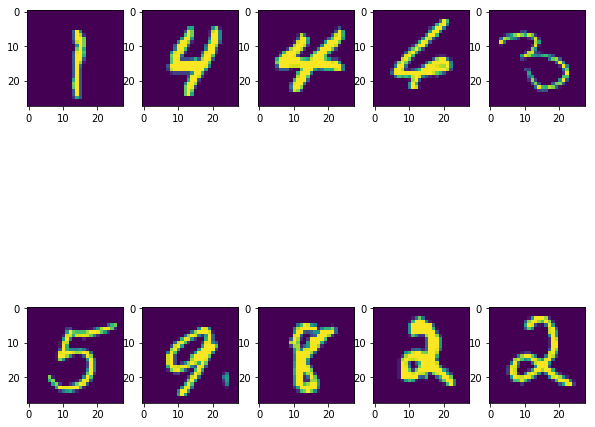

In [3]:
fig = plt.figure(figsize=(10,10))
for i, (images, labels) in enumerate(train_loader):
    if i > 9: break
    fig.add_subplot(2,5,i+1)
    #print(type(images[i,0]))
    plt.imshow(images[i,0])

In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.sigm = nn.Sigmoid()
        self.conv1 = nn.Conv2d(1,6,5,stride=1, padding=2)
        self.avgpool1 = nn.AvgPool2d(2)
        self.conv2 = nn.Conv2d(6,16,6, stride=1, padding=0)
        self.avgpool2 = nn.AvgPool2d(2) # 5x5 size of image
        self.conv3 = nn.Conv2d(16,120,3)
        self.fcc1 = nn.Linear(480,10)        
    
    def forward(self, x):
        x = self.conv1(x) 
        ## Stage 1
        x = self.avgpool1(x)
        x = self.sigm(x)
        x = self.conv2(x) 
        ## Stage 2
        x = self.avgpool2(x)
        x = self.sigm(x)
        x = self.conv3(x) 
        ## Stage 3
        x = x.view(-1, x.shape[1]*x.shape[2]*x.shape[3])
        x = self.fcc1(x)
        return x

In [5]:
net = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [6]:
num_epochs = 5
loss_log = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): 
        #print(images.shape)              # Load a batch of images with its (index, data, class)
        images = Variable(images)         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
    loss_log.append(loss.data[0])

Epoch [1/5], Step [100/600], Loss: 2.2724
Epoch [1/5], Step [200/600], Loss: 0.9382
Epoch [1/5], Step [300/600], Loss: 0.5055
Epoch [1/5], Step [400/600], Loss: 0.6132
Epoch [1/5], Step [500/600], Loss: 0.4117
Epoch [1/5], Step [600/600], Loss: 0.4340
Epoch [2/5], Step [100/600], Loss: 0.4046
Epoch [2/5], Step [200/600], Loss: 0.5796
Epoch [2/5], Step [300/600], Loss: 0.3707
Epoch [2/5], Step [400/600], Loss: 0.4456
Epoch [2/5], Step [500/600], Loss: 0.3882
Epoch [2/5], Step [600/600], Loss: 0.2517
Epoch [3/5], Step [100/600], Loss: 0.3625
Epoch [3/5], Step [200/600], Loss: 0.2524
Epoch [3/5], Step [300/600], Loss: 0.2914
Epoch [3/5], Step [400/600], Loss: 0.1919
Epoch [3/5], Step [500/600], Loss: 0.3080
Epoch [3/5], Step [600/600], Loss: 0.2326
Epoch [4/5], Step [100/600], Loss: 0.0809
Epoch [4/5], Step [200/600], Loss: 0.3190
Epoch [4/5], Step [300/600], Loss: 0.2547
Epoch [4/5], Step [400/600], Loss: 0.1568
Epoch [4/5], Step [500/600], Loss: 0.2603
Epoch [4/5], Step [600/600], Loss:

In [7]:
correct = 0
wrong = 0
total = 0
wrong_class = []
for images, labels in test_loader:
    images = Variable(images)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment total count
    correct += (predicted == labels).sum()     # Increment correct count
    wrong += (predicted != labels).sum()
    mask = predicted != labels
    
    #print(Variable(mask.nonzero().squeeze()).shape)
    if len(mask.nonzero().shape) != 0:
        wrong_images = images.index_select(dim=0,index=Variable(mask.nonzero().squeeze()))
        wrong_labels = predicted[mask]
        wrong_class.append([wrong_images, wrong_labels])
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))
print("Wrong: " + str(wrong))
print("Correct: " + str(correct))

Accuracy of the network on the 10K test images: 95 %
Wrong: 427
Correct: 9573


### Which images did we get wrong?

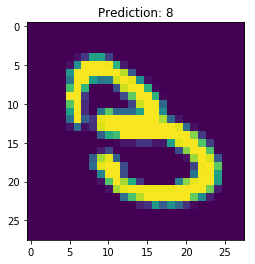

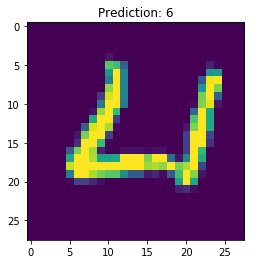

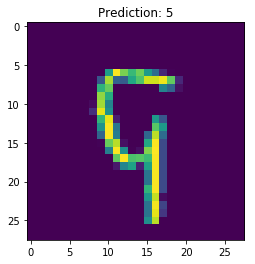

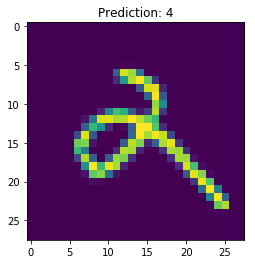

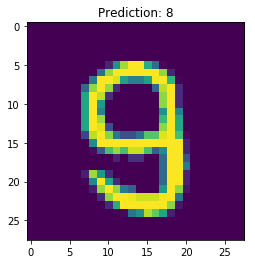

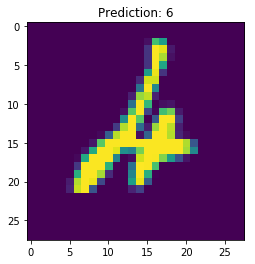

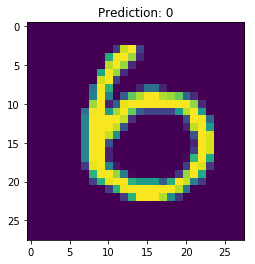

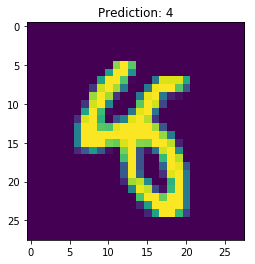

In [9]:
for batch in wrong_class[:3]:
    for x in range(len(batch[0])):
        fig = plt.figure()
        plt.title("Prediction: " + str(batch[1][x]))
        plt.imshow(batch[0][x][0].data)

## Exercise: Calculate the size of different feature maps 
You task is to calulcate the size of feature map at various stages during the forward pass.  
After you are finished you can use print statements during the forward pass to control your results.

In [ ]:
# Your results

# Format: Batch_size x Channel size x Width x Height

# Stage 1: 0x0x0x0

# Stage 2: 0x0x0x0

# Stage 3: 0x0x0x0